In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import os,sys
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import pandas as pd
import os
from typing import List, Dict
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
calm_df = pd.read_csv('/hpcfs/fhome/yangchh/workdir/self/TLCP-EPE/DLs/BiGRU-Attention-MLP/TLC-EPE-checkpoints/huggingface_calm.csv')
calm_df["embedding_model"]="CaLM"
calm_prot_df = pd.read_csv('/hpcfs/fhome/yangchh/workdir/self/TLCP-EPE/DLs/BiGRU-Attention-MLP/TLCP-EPE-checkpoints/Finetune_CaLM+ProtT5.csv')
calm_prot_df["embedding_model"]="CaLM+ProtT5"
prot_df = pd.read_csv('/hpcfs/fhome/yangchh/workdir/self/TLCP-EPE/DLs/BiGRU-Attention-MLP/TLP-EPE-checkpoints/prot_t5_xl_uniref50.csv')
prot_df["embedding_model"]="ProtT5"

# 准备数据
metrics = ['auc', 'accuracy', 'precision', 'recall', 'f1', 'mcc' ]
models = ['ProtT5', 'CaLM', 'CaLM+ProtT5']

# 创建一个新的DataFrame用于绘图
plot_data = []
for metric in metrics:
    for model in models:
        if model == 'ProtT5':
            
            data = prot_df[metric]
        elif model == 'CaLM':
            data = calm_df[metric]
            
        elif model == 'CaLM+ProtT5':
            data = calm_prot_df[metric]
       
        for value in data:
            plot_data.append({
                'Metric': metric.upper() if metric == 'auc' else metric.capitalize(),
                'Value': value,
                'Model': model
            })

plot_df = pd.DataFrame(plot_data)


plot_df["Model"] = plot_df.Model.str.replace("ProtT5","TLP-EPE")
plot_df["Model"] = plot_df.Model.str.replace("CaLM","TLC-EPE")
plot_df["Model"] = plot_df.Model.str.replace("TLC-EPE+TLP-EPE","TLCP-EPE")
plot_df["Metric"] = plot_df.Metric.str.replace("Accuracy","ACC")

In [3]:
# 计算每个model的统计信息
summary_stats = plot_df.groupby(['Model', 'Metric'])['Value'].agg(['mean', 'std', 'min', 'max']).reset_index()

print("每个Model的详细统计信息：")
print(summary_stats)

# 或者如果你想要更简洁的格式，可以按model分组显示
print("\n按Model分组的统计信息：")
for model in plot_df['Model'].unique():
    print(f"\n{model}:")
    model_data = plot_df[plot_df['Model'] == model]
    model_stats = model_data.groupby('Metric')['Value'].agg(['mean', 'std']).reset_index()
    for _, row in model_stats.iterrows():
        print(f"  {row['Metric']}: {row['mean']:.4f} ± {row['std']:.4f}")

# 如果你想要每个model的整体平均性能
print("\n每个Model的整体平均性能：")
overall_performance = plot_df.groupby('Model')['Value'].agg(['mean', 'std']).reset_index()
overall_performance = overall_performance.sort_values('mean', ascending=False)
print(overall_performance)

# 创建透视表格式
pivot_table = plot_df.pivot_table(values='Value', index='Model', columns='Metric', aggfunc='mean')
print("\n透视表（均值）：")
print(pivot_table)

每个Model的详细统计信息：
       Model     Metric      mean       std       min       max
0    TLC-EPE        ACC  0.778331  0.035345  0.732558  0.837209
1    TLC-EPE        AUC  0.809628  0.036862  0.745226  0.861957
2    TLC-EPE         F1  0.777568  0.035192  0.731651  0.835788
3    TLC-EPE        Mcc  0.558884  0.069516  0.465095  0.672495
4    TLC-EPE  Precision  0.779420  0.034947  0.731602  0.837719
5    TLC-EPE     Recall  0.779466  0.034591  0.733497  0.834783
6   TLCP-EPE        ACC  0.790027  0.041484  0.720930  0.848837
7   TLCP-EPE        AUC  0.822281  0.042144  0.755046  0.895109
8   TLCP-EPE         F1  0.788577  0.041773  0.718494  0.848817
9   TLCP-EPE        Mcc  0.581051  0.084668  0.436989  0.703393
10  TLCP-EPE  Precision  0.791442  0.042501  0.718494  0.851220
11  TLCP-EPE     Recall  0.789626  0.042283  0.718494  0.852174
12   TLP-EPE        ACC  0.743365  0.052276  0.651163  0.813953
13   TLP-EPE        AUC  0.770974  0.060380  0.666667  0.851087
14   TLP-EPE         F1 

In [3]:
pivot_table

Metric,ACC,AUC,F1,Mcc,Precision,Recall
Model,,,,,,
TLC-EPE,0.778331,0.809628,0.777568,0.558884,0.779420,0.779466
TLCP-EPE,0.790027,0.822281,0.788577,0.581051,0.791442,0.789626
TLP-EPE,0.743365,0.770974,0.735156,0.486459,0.750058,0.737102


In [4]:
# 计算每个model在各个metric上的统计信息
def create_plot_data(df, model_name):
    data = []
    metric_names = {'auc': 'AUC', 'accuracy': 'ACC', 'f1': 'F1', 'mcc':'MCC'}
    for metric, display_name in metric_names.items():
        data.append({
            'Metric': display_name,
            'Mean': df[metric].mean(),
            'Std': df[metric].std(),
            'Method': model_name
        })
    return pd.DataFrame(data)

# 创建数据
calm_data = create_plot_data(calm_df, 'Codon')
calm_prot_data = create_plot_data(calm_prot_df, 'Codon-Protein')
prot_data = create_plot_data(prot_df, 'Protein')

# 合并所有数据
all_data = pd.concat([prot_data, calm_data, calm_prot_data])

# ✅ 只保留 AUC, ACC, F1
metrics_order = ['AUC', 'ACC', 'F1', 'MCC']
all_data = all_data[all_data['Metric'].isin(metrics_order)].copy()

# 保证 x 轴顺序
all_data['Metric'] = pd.Categorical(all_data['Metric'], categories=metrics_order, ordered=True)
all_data = all_data.sort_values(['Metric', 'Method'])

# ✅ 设置 Method 的排序：TLCP-EPE, TLC-EPE, TLP-EPE
method_order = ['Codon-Protein', 'Codon', 'Protein']
all_data['Method'] = pd.Categorical(all_data['Method'], categories=method_order, ordered=True)

# 排序数据
all_data = all_data.sort_values(['Metric', 'Method'])

In [12]:
all_data

,Metric,Mean,Std,Method
0,AUC,0.807867,0.045302,Codon-Protein
0,AUC,0.795660,0.053376,Codon
0,AUC,0.752825,0.070926,Protein
1,ACC,0.767811,0.049486,Codon-Protein
1,ACC,0.764282,0.038112,Codon
1,ACC,0.721122,0.053026,Protein
2,F1,0.766003,0.050560,Codon-Protein
2,F1,0.762859,0.038569,Codon
2,F1,0.714146,0.061505,Protein
3,MCC,0.534357,0.100000,Codon-Protein


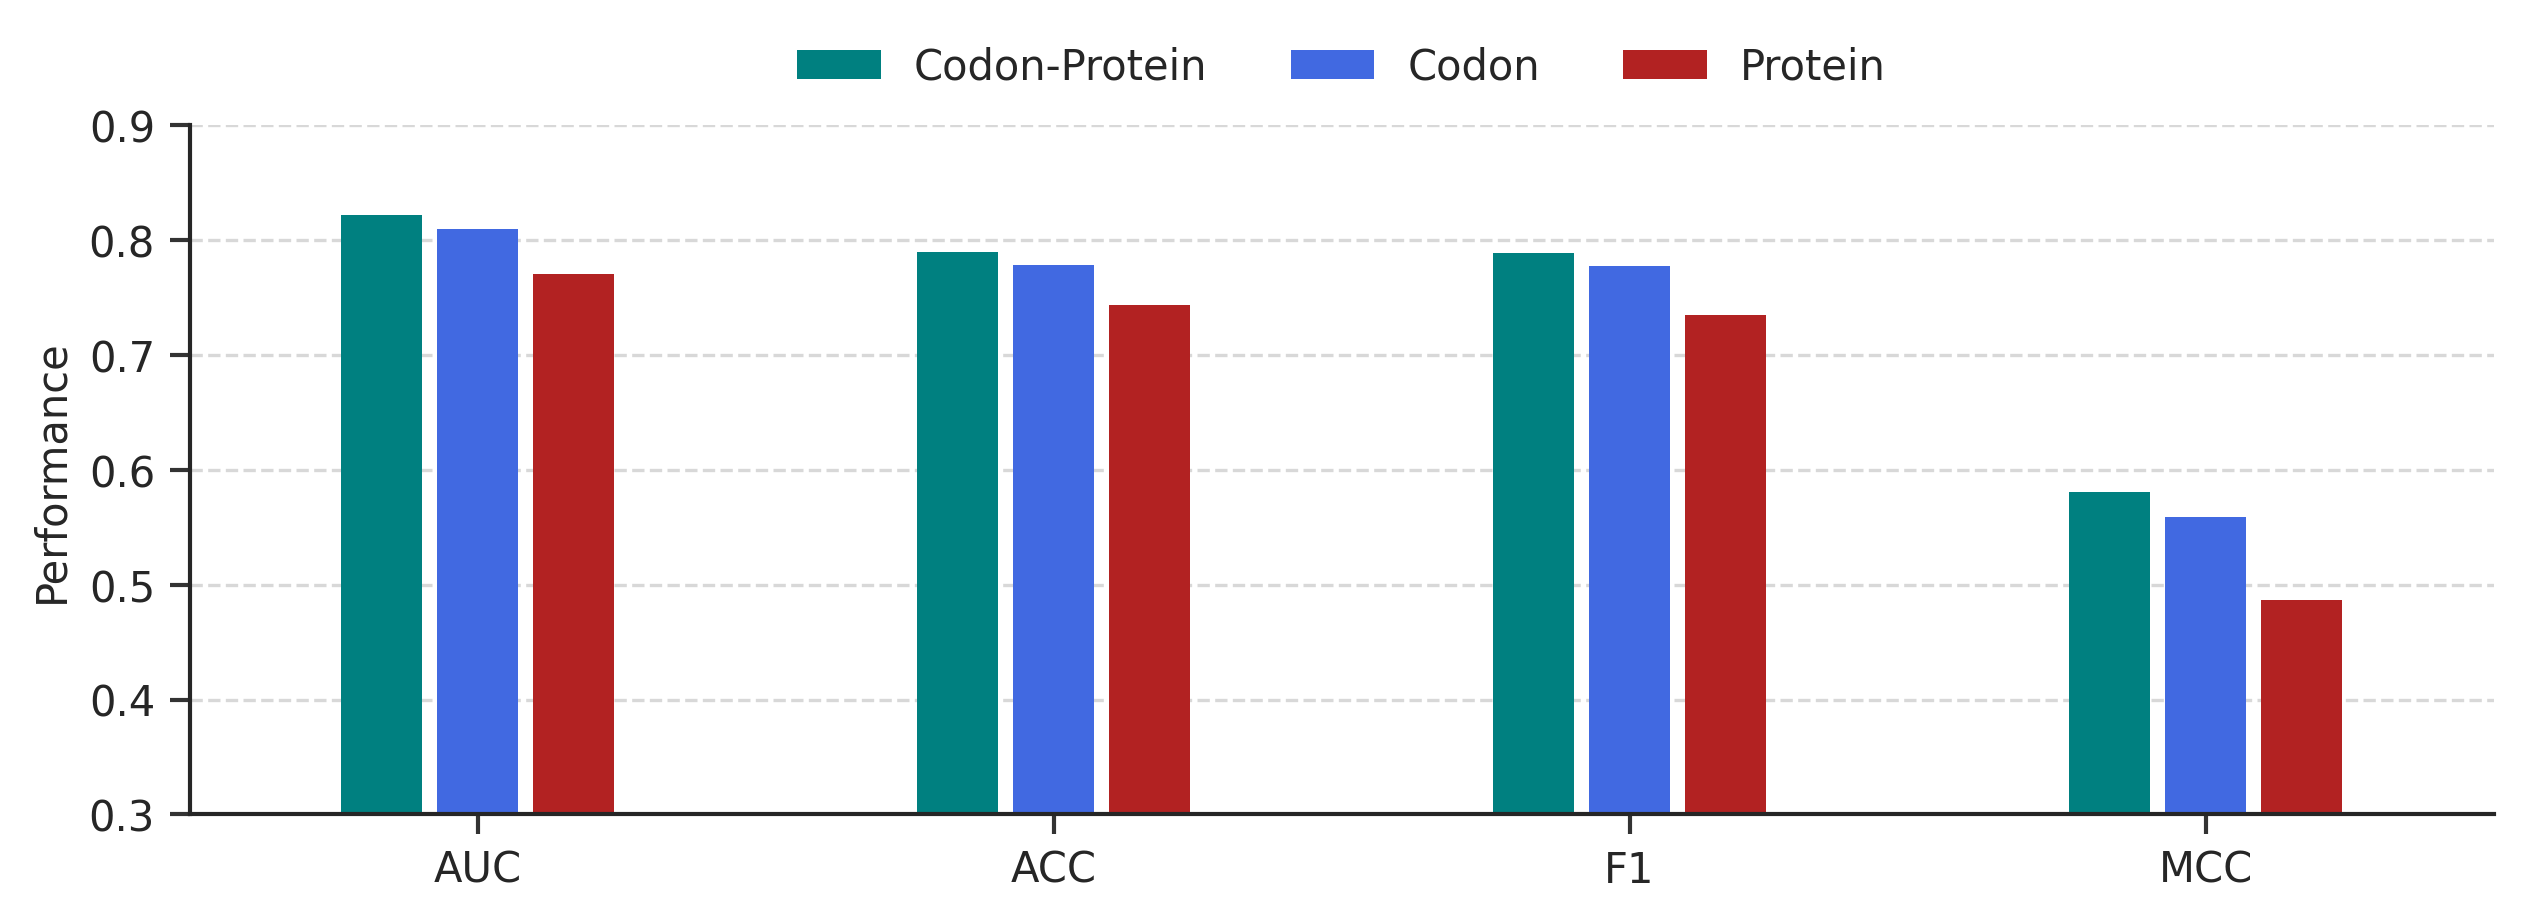

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd

# 设置出版级样式
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
sns.set_theme(style="ticks", context="paper")

# ✅ 新的颜色方案 - 保持专业风格但与之前区分
custom_palette = [
    '#008080',  # Bright Blue - TLC-EPE
    '#4169E1',  # Purple - TLCP-EPE
    '#B22222',   # Orange - TLP-EPE
    '#A9A9A9'
]


label_fontsize = 10
tick_labelsize = 10
title_fontsize = 10



# ========== 创建图形 ==========
# fig, ax = plt.subplots(
#     1, 1,
#     figsize=(10, 2.25),
#     dpi=300
# )

fig, ax = plt.subplots(
    1, 1,
    figsize=(8.5, 3.8),
    dpi=300
)

# ========== 绘制条形图 ==========
bar = sns.barplot(
    x="Metric", y="Mean", hue="Method", data=all_data,
    palette=custom_palette,
    ax=ax,
    linewidth=0,
    width=0.5,
    saturation=1.0,
    dodge=True,
    gap=0.15
)


# 设置 y 轴
ax.set_ylim(0.3, 0.9)
y_ticks = np.linspace(0.3, 0.9, 5)
ax.set_yticks(y_ticks)
ax.set_yticks(np.arange(0.3, 0.91, 0.1))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.set_ylabel("Performance", fontsize= label_fontsize )
ax.set_xlabel("")

# 刻度和网格
ax.tick_params(axis='both', labelsize=tick_labelsize, color='#333333')
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3, linewidth=0.8)
ax.set_axisbelow(True)

# 设置 x 轴标签
ax.set_xticklabels(metrics_order, rotation=0)

# 去掉上边框和右边框
sns.despine(ax=ax, top=True, right=True)


# ========== 创建横向图例 ==========
custom_patches = [
    Rectangle((0, 0), 1, 1, facecolor=custom_palette[i], linewidth=0)
    for i in range(3)
]

labels = ['Codon-Protein', 'Codon', 'Protein']

ax.legend(
    custom_patches,
    labels,
    loc='upper center',
    ncol=3,  # 横向排列
    fontsize=10,
    title_fontsize=11,
    frameon=False,
    bbox_to_anchor=(0.5, 1.17)  # 调整位置到图表上方
)

# ========== 布局调整 ==========
plt.tight_layout(rect=[0, 0.06, 1, 0.92])

# ========== 保存 ==========
plt.savefig("model_comparison_barplot_single.pdf", dpi=300, bbox_inches='tight')
plt.savefig("model_comparison_barplot_single.png", dpi=300, bbox_inches='tight')

plt.show()

